In [1]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import math, time, progressbar
from snn.components.neuron_class import Neuron
from snn.components.synapse_class import Synapse
from snn.components.network_class import *
from snn.functions import *

In [2]:
np.random.seed(0)

Text(0, 0.5, 'psp')

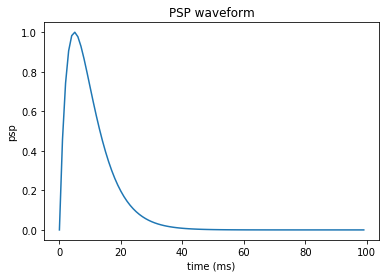

In [3]:
dt=1e-3
h = get_psp_waveform(dt, tau1=6e-3, tau2=4e-3)
plt.plot(h)
plt.title("PSP waveform")
plt.xlabel('time (ms)')
plt.ylabel('psp')

define constants

In [4]:
# v_init=np.random.uniform(0, 1, size=(2,1))
T = 1000
V_0 = 1.5
v_ext = V_0*np.ones((2, T)) #same frequency of oscillation
adj_mat = np.array([[1, 1], [1, 1]])

In [5]:
v_init_val = np.linspace(0, 1, 5)

w_val_self = np.linspace(-3, 3, 20)
w_val_self = np.arange(-3, 4, 1)
w_val_cross = np.linspace(0, 3, 20)

# t_s_all = np.zeros((len(w_val_self),len(w_val_cross)))
delphi_all = np.zeros((len(w_val_self),len(w_val_cross), len(v_init_val)))

In [6]:
widgets=[progressbar.Bar('#', '[', ']'), ' ', progressbar.Percentage()]
bar = progressbar.ProgressBar(maxval=len(w_val_self)*len(w_val_cross)*len(v_init_val), widgets=widgets).start()
tic = time.time()

# over initial conditions
for x in range(len(v_init_val)):
    v_init=np.array([0,v_init_val[x]]).reshape((2,1)) #neuron one is always at 0 phase
    # over self and cross coupling parameters:
    for i in range(len(w_val_self)):
        for j in range(len(w_val_cross)):
            bar.update(len(w_val_cross)*len(w_val_self)*x+ len(w_val_cross)*i + j+1)
            w_self = w_val_self[i]
            w_cross = w_val_cross[j]

            net, probe = create_network(2, w_self, w_cross, adj_mat, h, v_init, T)

            for ti in range(T):
                net.update_state(dt, v_ext[:,ti].reshape((-1,1)), probe, ti)

            f, phi = osc_state(probe['spike'], dt)

#             if np.abs(f[0,-1]-f[1,-1])<1e-3:
#                 delphi_all[i,j, x] = (phi[1,-1]-phi[0,-1])%360
#             else:
#                 print(f"no settling for w_self={w_self}, w_cross={w_cross} (i={i}, j={j})")
#                 delphi_all[i,j, x] = -1
            delphi_all[i,j, x] = np.mean((phi[1,-5:]-phi[0,-5:])%360)
print(f"total time for {delphi_all.size} iterations: {time.time()-tic}s")

total time for 700 iterations: 68.01743197441101s


Text(0.5, 0.98, 'Sensitivity to v_init difference')

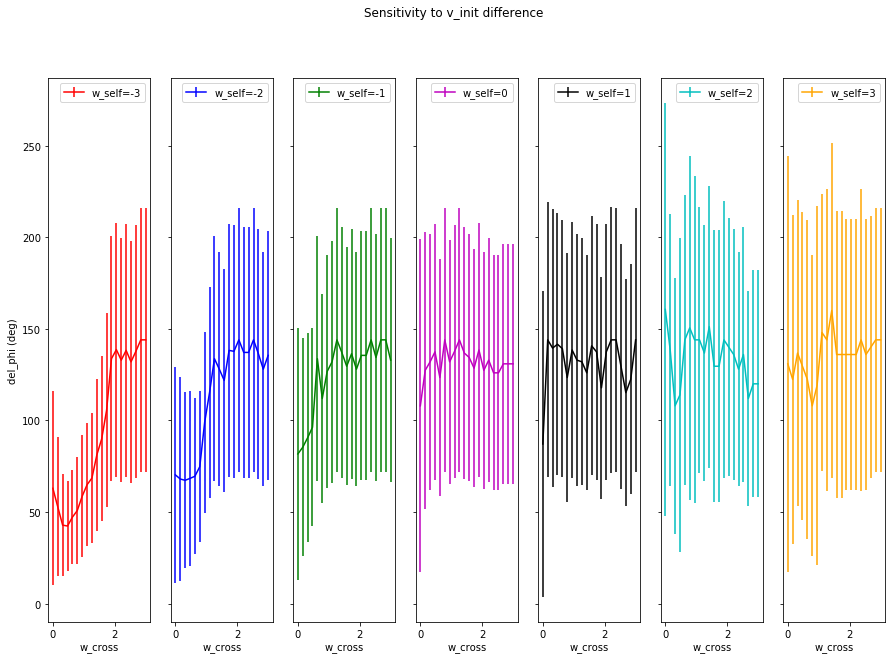

In [7]:

fig, ax = plt.subplots(1, len(w_val_self), figsize=(15,10),squeeze=True, sharey=True)  #
color = ['r', 'b', 'g', 'm', 'k', 'c', 'orange']
for ind in range(len(w_val_self)):
    c = color[ind]
    dphi = delphi_all[ind, :, :]
    mean_dphi = np.mean(dphi, axis=1)
    ax[ind].errorbar(w_val_cross, mean_dphi, fmt=c,
                 yerr=np.std(dphi, axis=1))
    ax[ind].legend(['w_self='+str(w_val_self[ind])])
    ax[ind].set_xlabel('w_cross')
    if ind==0:
        ax[ind].set_ylabel('del_phi (deg)')
fig.suptitle('Sensitivity to v_init difference')

# Dependence on w_self

In [8]:
# v_init=np.random.uniform(0, 1, size=(2,1))
T = 1000
V_0 = 1.5
v_ext = V_0*np.ones((2, T)) #same frequency of oscillation
adj_mat = np.array([[1, 1], [1, 1]])

In [9]:
v_init_val = np.linspace(0, 1, 5)

w_val_self = np.linspace(-3, 3, 20)
w_val_cross = np.arange(0, 4, 0.5)
w_val_self = np.linspace(-3, 3, 20)

# t_s_all = np.zeros((len(w_val_self),len(w_val_cross)))
delphi_all = np.zeros((len(w_val_self),len(w_val_cross), len(v_init_val)))

In [10]:
widgets=[progressbar.Bar('#', '[', ']'), ' ', progressbar.Percentage()]
bar = progressbar.ProgressBar(maxval=len(w_val_self)*len(w_val_cross)*len(v_init_val), widgets=widgets).start()
tic = time.time()

# over initial conditions
for x in range(len(v_init_val)):
    v_init=np.array([0,v_init_val[x]]).reshape((2,1)) #neuron one is always at 0 phase
    # over self and cross coupling parameters:
    for i in range(len(w_val_self)):
        for j in range(len(w_val_cross)):
            bar.update(len(w_val_cross)*len(w_val_self)*x+ len(w_val_cross)*i + j+1)
            w_self = w_val_self[i]
            w_cross = w_val_cross[j]

            net, probe = create_network(2, w_self, w_cross, adj_mat, h, v_init, T)

            for ti in range(T):
                net.update_state(dt, v_ext[:,ti].reshape((-1,1)), probe, ti)

            f, phi = osc_state(probe['spike'], dt)

#             if np.abs(f[0,-1]-f[1,-1])<1e-3:
#                 delphi_all[i,j, x] = (phi[1,-1]-phi[0,-1])%360
#             else:
#                 print(f"no settling for w_self={w_self}, w_cross={w_cross} (i={i}, j={j})")
#                 delphi_all[i,j, x] = -1
            delphi_all[i,j, x] = np.mean((phi[1,-5:]-phi[0,-5:])%360)
print(f"total time for {delphi_all.size} iterations: {time.time()-tic}s")

total time for 800 iterations: 86.52515649795532s


In [11]:
-2000%360

160

Text(0.5, 0.98, 'Sensitivity to v_init difference')

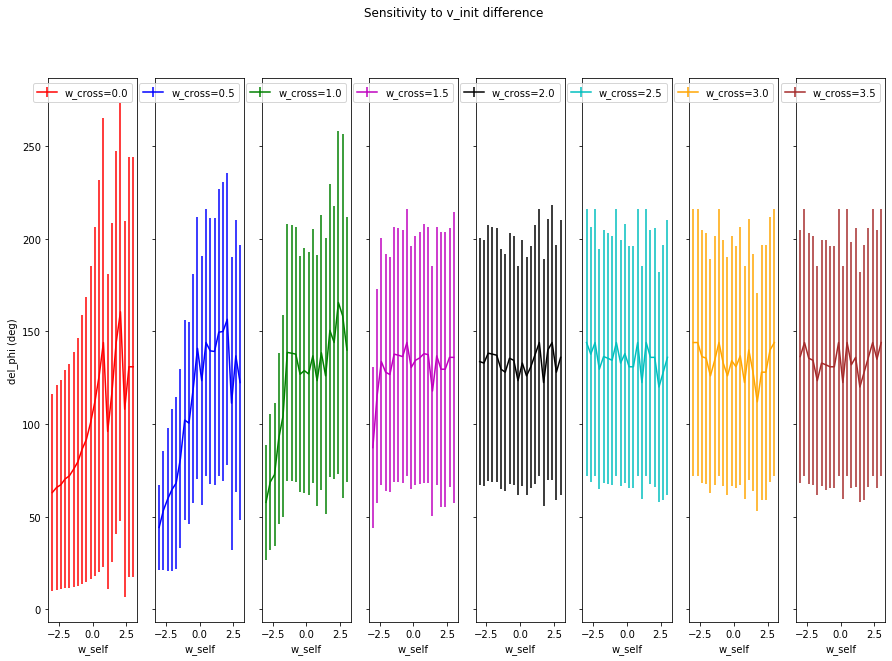

In [12]:

fig, ax = plt.subplots(1, len(w_val_cross), figsize=(15,10),squeeze=True, sharey=True)  #
color = ['r', 'b', 'g', 'm', 'k', 'c', 'orange', 'brown']
for ind in range(len(w_val_cross)):
    c = color[ind]
    dphi = delphi_all[:, ind, :]
    mean_dphi = np.mean(dphi, axis=1)
    ax[ind].errorbar(w_val_self, mean_dphi, fmt=c,
                 yerr=np.std(dphi, axis=1))
    ax[ind].legend(['w_cross='+str(w_val_cross[ind])])
    ax[ind].set_xlabel('w_self')
    if ind==0:
        ax[ind].set_ylabel('del_phi (deg)')
fig.suptitle('Sensitivity to v_init difference')

In [13]:
# for i in range(5):
#     plt.plot(w_val_cross, delphi_all[i,:], 'o--')
# #     plt.ylim(-0.2, 1)
# plt.xlabel('w_cross')
# plt.ylabel('delphi (deg)')
# plt.title('Settling phase vs w_cross for different w_self')
# plt.legend([str(np.round(w_val_self[i])) for i in range(5)])

In [14]:
plt.errorbar()

TypeError: errorbar() missing 2 required positional arguments: 'x' and 'y'

In [ ]:
# for i in range(5):
#     plt.plot(w_val_self, delphi_all[:,4*i], 'o--')
# #     plt.ylim(-0.2, 1)
# plt.xlabel('w_self')
# plt.ylabel('delphi (deg)')
# plt.title('Settling phase vs w_self for different w_cross')
# plt.legend([str(np.round(w_val_cross[4*i])) for i in range(5)])